### Escalamiento de datos numéricos
#### Transformaciones lineales

importar librerías: 

**timeit** mide el performance de los modelos para poder observar qué tan eficiente es el algoritmo a la hora de ejecutar la convergencia normalizando los datos

* mide el tiempo de ejecución de los modelos

**sklearn** con las funciones: dataset (descargar el dataset) y linear_model(regresión lineal sencilla)

**pandas** 

**matplotlib.pyplot**



In [ ]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets , linear_model

1- cargar el dataset con dos variables

2- determinar los datos crudos sin normalizar: `raw= X[ : , None , 2 ]`
* esta transformación puede crear un pooco de confusión si no se conocen algunos detalles de Numpy.
 "X" tiene un shape de (442 elementos * columna,10 columnas)
 * * para el estudio, solo se necesita una columna, por lo que buscamos tener un "raw" de 1 con sos demás elementos 
 * * " : " tiene todas las columnas y filas
 * * " None " indica la transformación del array(*newaxis*)
 * * " 2 " selecciona la 3ra columna de x 


In [ ]:
X,y = datasets.load_diabetes(return_X_y = True) #1 ( variable "y" contiene los datos)
raw = X [: , None , 2] # sin slices, indicar nuevo eje , seleccionar columna 3 (sub 2)


establecer lar reglas de escalamiento: *min/max*

(2 * raw -min - max ) / max - min 

In [ ]:
min_raw= min(raw)
max_raw = max(raw)
scaled_max_min = (2 *raw - min_raw - max_raw) / (max_raw - min_raw)

#### Graficar histogramas: crudo y normalizado 
comprobar la eficiencia del escalemiento con la librería timeit:
* 1- crear un objeto con dos variables, el primero equivalente a la figura y el segundo a los ejes:
* * los ojos son para definir la posición del gráfico ( arriba, abajo, etc) 
* 2- definir las gráficas que se van a dibujar con la función `plt.subplots` (*matplotlib*) con parámetros:
* * indicar cuántas filas y columnas tendrá la gráfica ( 2 filas , 1 columna )
* * con `sharex = True`inicar que las gráficas compartirán el eje x, para que sea más fácil de comparar 
* * finalmente hay que saignar un gráfico en cada eje, la variable "axs" generará un array de dos gráficos, aclarando qué gráfico estará en qué posición
    `axs[0] = grafico ,  axs[1] = otro_grafico`

* * * para graficar se usa la función `hist()` como parámetro hay que indicar la variable que contiene la gráfica    

        siendo de la siguiente forma:  
        * `fig , axs = plt.subplots(2,1 , sharex = True)`
        * `axs[0].hist(raw)`
        * `axs[1].hist(scaled_max_min)`

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

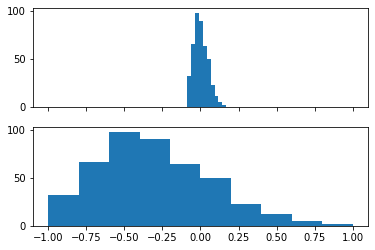

In [ ]:
fig , axs = plt.subplots(2 ,1 , sharex = True)
axs[0].hist(raw)
axs[1].hist(scaled_max_min)

Podemos observar que los datos están escalados entre valores [-1 , 1], y que estamos ante una distribución NO gaussiana

### Entrenar el modelo
usando la función `.LinearRegression` de la clase `linear model`, ubicada en *sklearn*
* Posteriormente hay que ajustar el modelo a los datos especificados usando la funcion `fit()` con el dataset como parámetro, y la variable " y " porque inicialmente se le pasaron los elementos del dataset por medio de esta variable (ver: #1)

quedando así: 

* * `def train_raw():`
* * `   linear_model.LinearRegression().fit(raw, y)`

Para comparar el comportamiento de ambos modelos (crudo y normalizado) habría que ejecutar una función similar pero con el modelo normalizado


In [ ]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_Scaled_max_min():
    linear_model.LinearRegression().fit(scaled_max_min, y)

#### Tiempo de ejecución del modelo
Ya estaría listo para calcular los tiempos que se toma la ejecución de un modelo, para ello, dentro de una variable hay que invocar a la función `timeit` de *timeit* con parámetros:
* la función de entrenamiento del modelo
* con la variable `number = #` aclarar cuántas veces para calcular el tiempo de ejecución

hacer esto con lasfunciones del entremaniento con datos crudos y normalizados



In [ ]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_max_main_time = timeit.timeit(train_Scaled_max_min , number = 100)

print('Train raw : {}'.format(raw_time) + '   Train Scaled max min = {}'.format(scaled_max_main_time))

Train raw : 0.05165642400243087   Train Scaled max min = 0.034199260000605136


Se observa que el entrenamiento del modelo normalizado es ligeramente mas eficiente, que si bien no hay mucha diferencia, podría notarse con dataset más grandes

Ejecutar un entrenamiento con el algoritmo "z scaled"

### Transformaciones no lineales

importar dataset de los carros

In [ ]:
df = pd.read_csv('cars.csv')

Graficar histograma de la columna "price_usd"

<AxesSubplot:>

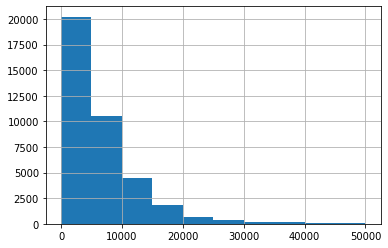

In [ ]:
df.price_usd.hist()

Para ejecutar una transfomación no lineal, utilizar la tangente hiperbólica: $$\text tanh(x)$$ con la librería *pandas* 
* usando la función `apply()` que toma todos los elementos de una columna especificada y les aplica una misma función (matemáticas). En consecuencia se produce una transformación gracias a la función matemática

* * la función `apply()` recibe parámetros lambda como parámetro. En ella  hay que declarar la función matemática:
* * * 1- lambda **x**:  *"x"  es el nombre de la variable*
* * * 2- función $$ \text tanh $$ aplicada a la variable "**x**"  que se va encontrando en esa columna, invocñandola desde la librería de *numpy*
* * * 3- para graficar un histograma con la función `tanh(x)` se usa `hist()` 

Quedando de la siguiente forma: 
 
`df.price_usd.apply(lambda x : np.tanh(x)).hist()`


<AxesSubplot:>

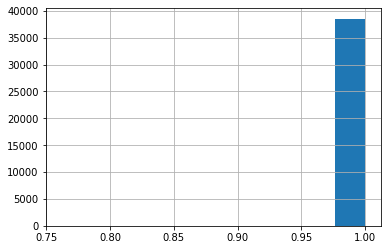

In [ ]:
df.price_usd.apply(lambda x : np.tanh(x)).hist()

Se observa que se colapsa todo un un solo valor, esto se debe a que era necesario calibrar la tangente hiperbólica dividiendo entre un número  "p" dentro de la función `np.tanh(x)` y ese número se va calibrando para ajustarlo. y así convertir los elementos a una posición más uniforme

 Siendo 10000 un número indicado para su normalización 

<AxesSubplot:>

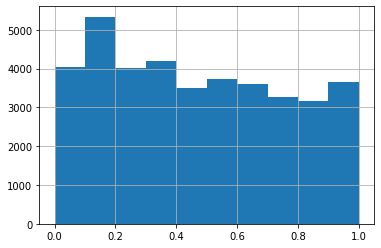

In [ ]:
p= 10000
df.price_usd.apply(lambda x : np.tanh(x/p)).hist()

Aplicar un escalamiento z-score en el ejemplo anterior:

1-variable con datos crudos, luego y graficarlos para saber cual es su comportamiento
2- aplicar el escalamiento z-score para saber cuál es su comportamiento

3- dependiendo de cual sea el resultado y ver cuál es el más óptimo (probablemente z score) hacer una transformaciónn no lineal, aplicándola a ambas distribuciones

* * Sacar promedio específico de columna (average)
* * Sacar desviación estándar (std)
* * implementar fórmula z scaled

4- establecer el lugar donde estarán las gráficas, comparando datos crudos y escalados

* * declarar dos variables (figura y axs) que van a iterar sobre la función `plt.subplots` con parámetros:
* * *  cantidas de gráficas (2 ) lugar donde estarán posicionadas (1) 
* * *  aclarar de que compartirán el eje x ( *sharex =* ) 
* * *  aclarar el layout










(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

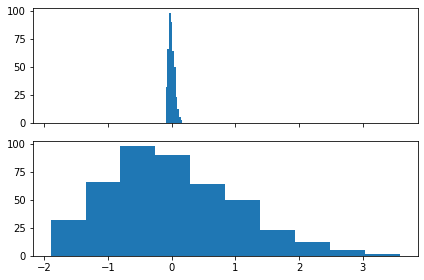

In [ ]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn import Linear_model , datasets

#X , y = datasets.load_diabetes(return_X_y=True)
#raw = X[:, None , 2]

z_score_average = np.average(raw)
z_score_std = np.std(raw)
scaled_z_score = (raw - z_score_average) / z_score_std


fig , axs = plt.subplots(2, 1 , sharex= True , tight_layout = True)

axs[0].hist(raw)
axs[1].hist(scaled_z_score)

implementar el modelo de entrenamiento para z-score, comparado con el entrenamiento con datos crudos

1- declarar funciones con datos crudos y escalados
* * aplicar la función `LinearRegression()` de la clase *Linear_model* de *sklearn*
* * dicha funcion `LinearRegression()` será afectada por la función `fit()`que tendrá parámetros:
* * * la variable que contiene los datos crudos ó escalados y la variable que contiene los elementos de dataset (y)#1
* * * con el parámetro `number = ` aclarar las veces que se hará la repetición de la función, y medir así el tiempo que tarda en terminarse

2- para medir el tiempo, declarar en una nueva variable la función `timeit` de la clase *timeit* con parámetros: la función que contiene los datos crudos en una regresión lineal. Hacer lo mismo con otra variable con mismos parámetros, pero con los datos escalados

3- imprimir usando `.format(función tiempo)`




In [ ]:
#datos en crudo
def raw_training():
    linear_model.LinearRegression().fit(raw , y)

#datos con z-score
def zscore_training():
    linear_model.LinearRegression().fit(scaled_z_score, y)

raw_timing = timeit.timeit(raw_training, number = 100)
zscore_timing = timeit.timeit(zscore_training , number = 100)    

print(' Time with raw data: {}'.format(raw_timing) , ' Time with scaled data(zscore): {}'.format(zscore_timing))

 Time with raw data: 0.055622672000026796  Time with scaled data(zscore): 0.032299568003509194


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f7ed4f37-4313-47ef-a399-629d97cb985b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>